In [2]:
import os

from IPython.display import display, Image

import matplotlib.pyplot as plt
import palettable

import numpy

import pandas as pd

import dmslogo
from dmslogo.colorschemes import CBPALETTE

In [93]:
mylocs = ['F377','K378','C379','G381','P384','L387','N394','R408','G413','D420','D427','D428','F486']

input_my_mut = 'D:/work/task_JZ/20211022_25_variation/for_20211011_Plot_manuscript/20210706_percentage_from_JZ/P14-44-20210706-matrix.xls'
input_public_exp = 'D:/work/task_JZ/20211129_COVID19_variation_GUI/single_mut_effects.csv'
input_public_variation = 'D:/work/task_JZ/20211129_COVID19_variation_GUI/1_variation_COVID19_Sarbecovirus.csv'

RBDlocs = ['N331','I332','T333','N334','L335','C336','P337','F338','G339','E340',
'V341','F342','N343','A344','T345','R346','F347','A348','S349','V350',
'Y351','A352','W353','N354','R355','K356','R357','I358','S359','N360',
'C361','V362','A363','D364','Y365','S366','V367','L368','Y369','N370',
'S371','A372','S373','F374','S375','T376','F377','K378','C379','Y380',
'G381','V382','S383','P384','T385','K386','L387','N388','D389','L390',
'C391','F392','T393','N394','V395','Y396','A397','D398','S399','F400',
'V401','I402','R403','G404','D405','E406','V407','R408','Q409','I410',
'A411','P412','G413','Q414','T415','G416','K417','I418','A419','D420',
'Y421','N422','Y423','K424','L425','P426','D427','D428','F429','T430',
'G431','C432','V433','I434','A435','W436','N437','S438','N439','N440',
'L441','D442','S443','K444','V445','G446','G447','N448','Y449','N450',
'Y451','L452','Y453','R454','L455','F456','R457','K458','S459','N460',
'L461','K462','P463','F464','E465','R466','D467','I468','S469','T470',
'E471','I472','Y473','Q474','A475','G476','S477','T478','P479','C480',
'N481','G482','V483','E484','G485','F486','N487','C488','Y489','F490',
'P491','L492','Q493','S494','Y495','G496','F497','Q498','P499','T500',
'N501','G502','V503','G504','Y505','Q506','P507','Y508','R509','V510',
'V511','V512','L513','S514','F515','E516','L517','L518','H519','A520',
'P521','A522','T523','V524','C525','G526','P527','K528','K529','S530','T531']


df = pd.read_excel(input_my_mut)
sample_num = sum(df.iloc[0:, 2])
RBD_len = len(df.columns) 
df2 = (df.iloc[0:,1:RBD_len] / 696) * 100
df2.index = df["aa"]
df2.columns =RBDlocs
df2.index.name = None
#print(df2.head())

pdata = pd.melt(df2.reset_index(),id_vars='index')
pdata['wildtype'] = pdata['variable'].str[0]
pdata['site_SARS2'] = pdata['variable'].str[1:].astype(int)
pdata.columns = ['mutant','loc','percentage','wildtype','site_SARS2']
#print(pdata)

pdata = pdata[pdata['loc'].str.contains('|'.join(mylocs)) & (pdata['mutant'] != pdata['wildtype'])]
print(pdata)
pdata.shape

     mutant   loc  percentage wildtype  site_SARS2
920       A  F377    0.143678        F         377
921       C  F377    0.000000        F         377
922       D  F377    0.000000        F         377
923       E  F377    0.000000        F         377
925       G  F377    0.000000        F         377
...     ...   ...         ...      ...         ...
3115      S  F486    0.000000        F         486
3116      T  F486    0.000000        F         486
3117      V  F486    0.000000        F         486
3118      W  F486    0.000000        F         486
3119      Y  F486    0.000000        F         486

[247 rows x 5 columns]


(247, 5)

In [94]:
# merge RBD expression data
exp = pd.read_csv(input_public_exp)
pdata2 = pd.merge(pdata, exp, how='left', on=['site_SARS2','wildtype','mutant'])
pdata2.fillna(0)

# merge variation data
variation = pd.read_csv(input_public_variation)
pdata3 = pd.merge(pdata2, variation, how='left', on='loc')

pdata4 = pdata3[['loc','mutation','wildtype','mutant','percentage','expr_avg',
                'Matchcount_COVID19','variation_COVID19','Matchcount_Sarbecovirus','variation_Sarbecovirus',
                'site_SARS2','site_RBD','mutation_RBD']]
print(pdata4.head())


    loc mutation wildtype mutant  percentage  expr_avg  Matchcount_COVID19  \
0  F377    F377A        F      A    0.143678     -2.17             3722233   
1  F377    F377C        F      C    0.000000     -1.24             3722233   
2  F377    F377D        F      D    0.000000     -2.75             3722233   
3  F377    F377E        F      E    0.000000     -3.19             3722233   
4  F377    F377G        F      G    0.000000     -2.93             3722233   

   variation_COVID19  Matchcount_Sarbecovirus  variation_Sarbecovirus  \
0           0.000011                       49                    0.02   
1           0.000011                       49                    0.02   
2           0.000011                       49                    0.02   
3           0.000011                       49                    0.02   
4           0.000011                       49                    0.02   

   site_SARS2  site_RBD mutation_RBD  
0         377        47         F47A  
1         377 

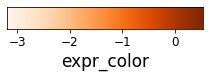

<ipython-input-131-8677334b6250>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expr_color'] = map1.val_to_color(df['expr_avg'])


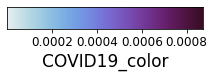

<ipython-input-131-8677334b6250>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COVID19_color'] = map2.val_to_color(df['variation_COVID19'])


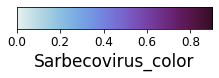

<ipython-input-131-8677334b6250>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sarbecovirus_color'] = map3.val_to_color(df['variation_Sarbecovirus'])


In [131]:
# Set color
### expr_color
df = pdata4
map1 = dmslogo.colorschemes.ValueToColorMap(minvalue=df['expr_avg'].min(),
                                            maxvalue=df['expr_avg'].max(),
                                            cmap='Oranges') # viridis
map1_fig, _ = map1.scale_bar(orientation='horizontal',
                             label='expr_color')
display(map1_fig)
plt.close(map1_fig)
df['expr_color'] = map1.val_to_color(df['expr_avg'])

###  variation_COVID19 color
map2 = dmslogo.colorschemes.ValueToColorMap(minvalue=df['variation_COVID19'].min(),
                                            maxvalue=df['variation_COVID19'].max(),
                                            cmap=palettable.cmocean.sequential.Dense_20.mpl_colormap)
map2_fig, _ = map2.scale_bar(orientation='horizontal',
                             label='COVID19_color')
display(map2_fig)
plt.close(map2_fig)
df['COVID19_color'] = map2.val_to_color(df['variation_COVID19'])

###  variation_COVID19 color
map3 = dmslogo.colorschemes.ValueToColorMap(minvalue=df['variation_Sarbecovirus'].min(),
                                            maxvalue=df['variation_Sarbecovirus'].max(),
                                            cmap=palettable.cmocean.sequential.Dense_20.mpl_colormap)
map3_fig, _ = map3.scale_bar(orientation='horizontal',
                             label='Sarbecovirus_color')
display(map3_fig)
plt.close(map3_fig)
df['Sarbecovirus_color'] = map3.val_to_color(df['variation_Sarbecovirus'])

#map1_fig.savefig("plots_legend_expresion_color_figureS6.pdf",bbox_inches = 'tight')
#map2_fig.savefig("plots_legend_variation_color_figureS6.pdf",bbox_inches = 'tight')

Figure(579.6x223.2)


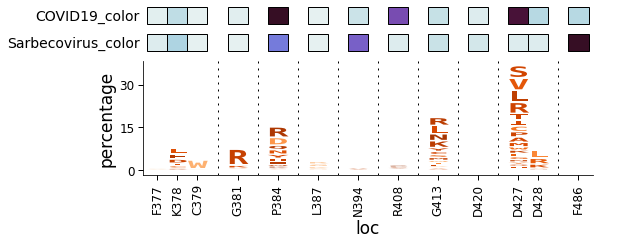

In [109]:
# LY_CoV016 LY_CoV555 REGN10933 REGN10987 
fig, ax = dmslogo.draw_logo(data=df,
                            x_col='site_SARS2',
                            letter_col='mutant',
                            letter_height_col='percentage',
                            xtick_col='loc',
                            color_col='expr_color',
                            heatmap_overlays=['COVID19_color','Sarbecovirus_color'])

#fig.savefig("plots_S6A1_LY_CoV555.pdf",bbox_inches = 'tight')
#plt.rcParams['svg.fonttype'] = 'none'
#fig.savefig(fname="plots_S6A1_LY_CoV555.svg",format="svg",bbox_inches = 'tight')
print(fig)

<ipython-input-145-fd43c37a0476>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.savefig(fname="D:/work/task_JZ/20211129_COVID19_variation_GUI/plots_S6A1_LY_CoV555.svg",format="svg",bbox_inches = 'tight')


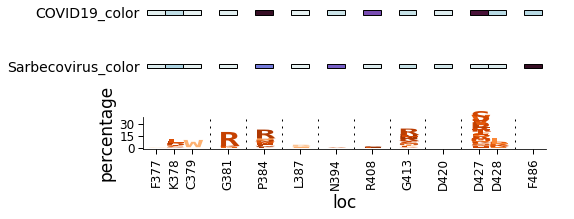

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


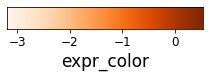

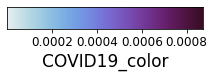

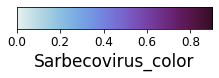

In [145]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ax1 = dmslogo.draw_logo(data=df,
                            x_col='site_SARS2',
                            letter_col='mutant',
                            letter_height_col='percentage',
                            xtick_col='loc',
                            color_col='expr_color',
                            heatmap_overlays=['COVID19_color','Sarbecovirus_color'])

fig, ax2 = map1.scale_bar(orientation='horizontal',
                             label='expr_color')
fig, ax3 = map2.scale_bar(orientation='horizontal',
                             label='COVID19_color')
fig, ax4 = map3.scale_bar(orientation='horizontal',
                             label='Sarbecovirus_color')
fig.savefig(fname="D:/work/task_JZ/20211129_COVID19_variation_GUI/plots_S6A1_LY_CoV555.svg",format="svg",bbox_inches = 'tight')